# customer segments

In [1]:
import datetime
from datetime import date

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# load the dataset
data=pd.read_csv("D:\\Sumeet Project\\customer_data.csv")

In [5]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/12,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/14,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/13,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/14,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/14,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [7]:
data.shape

(2240, 29)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [10]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

### since there are some missing values in Income we will check that column and replace missing values with mean or median

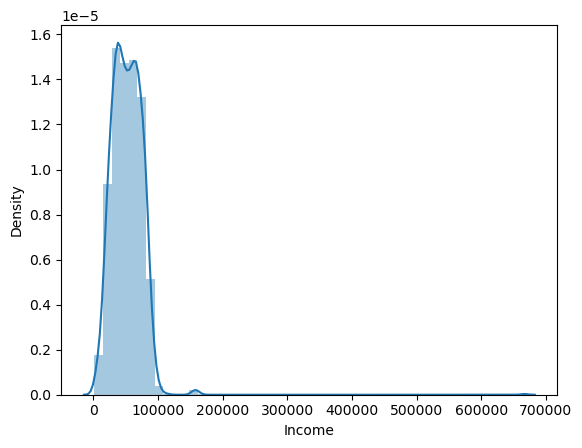

In [11]:
sns.distplot(data['Income'])
plt.show()

### replace the missing values with median

In [12]:
#FILL THE MISSING VALUES WITH THE MEDIAN VALUES.. 
data['Income']=data['Income'].fillna(data['Income'].median())

In [13]:
data[data.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [14]:
#FINDING THE NUMBER OF UNIQUE VALUES PRESENT IN EACH COLUMN...
data.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

 ### "Z_CostContact" and "Z_Revenue" have same value in all the rows that's why , they are not going to contribute anything in the model building. So we can drop them

In [15]:
data=data.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)

### 1.Analysis on Year_Birth Variable.

In [16]:
#CHECKING NUMBER OF UNIQUE CATEGORIES PRESENT IN THE "Year_Birth"
print("Unique categories present in the Year_Birth:",data["Year_Birth"].value_counts())

Unique categories present in the Year_Birth: 1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: Year_Birth, dtype: int64


### 2.Analysis On Education Variable.

In [17]:
data['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

### 3.Analysis On Marital Status Variable.

In [18]:
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

### 4.Analysis On Income Variable.

In [19]:
data['Income'].describe()

count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

### 5.Analysis On "Kidhome,Teenhome" Variable.

In [20]:
data['Teenhome'].unique()

array([0, 1, 2], dtype=int64)

In [21]:
data['Kidhome'].unique()

array([0, 1, 2], dtype=int64)

### 6.Analysis On "MntWines,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds" Variable.

In [22]:
data[['MntFruits','MntMeatProducts']].head()

,MntFruits,MntMeatProducts
0,88,546
1,1,6
2,49,127
3,4,20
4,43,118


In [23]:
data['MntFishProducts'].nunique()

182

In [24]:
data['MntFruits'].nunique()

158

In [25]:
# Combining different dataframe into a single column to reduce the number of dimension

data['Expenses'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
data['Expenses'].head(10)

0    1617
1      27
2     776
3      53
4     422
5     716
6     590
7     169
8      46
9      49
Name: Expenses, dtype: int64

In [26]:
data['Expenses'].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: Expenses, dtype: float64

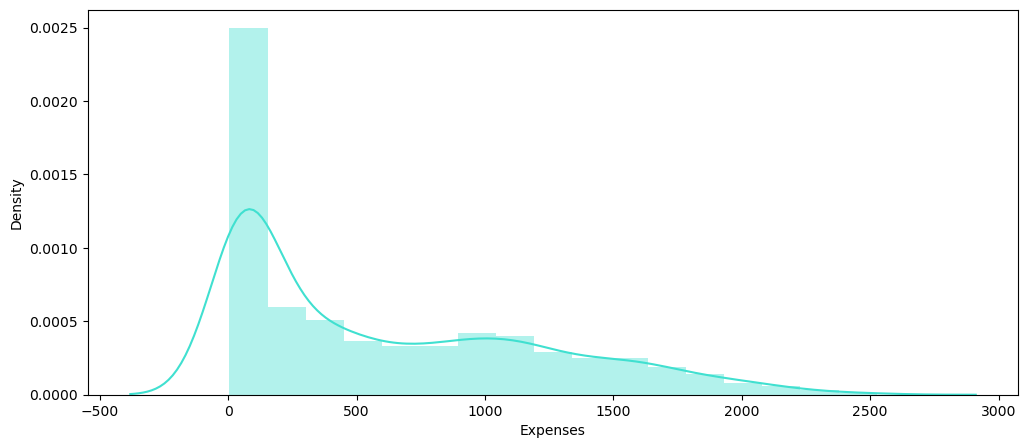

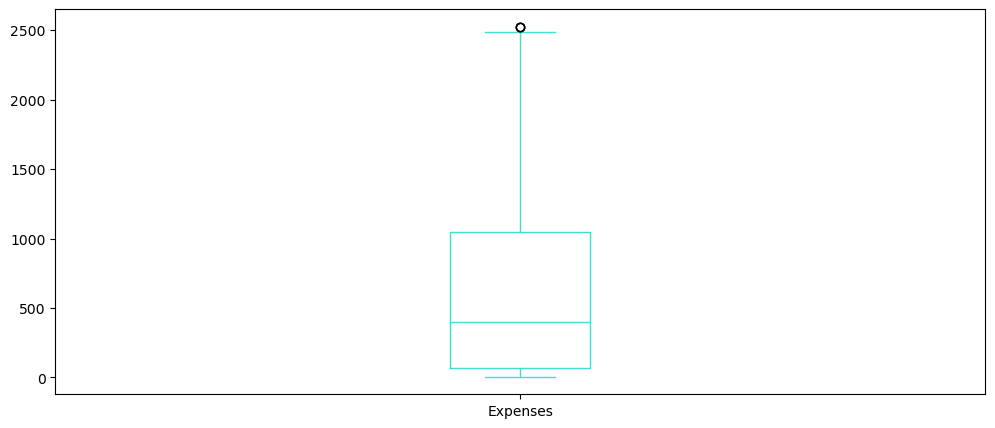

In [27]:
plt.figure(figsize=(12,5))
sns.distplot(data["Expenses"],color = 'turquoise')
plt.show()
data["Expenses"].plot.box(figsize=(12,5),color='turquoise')
plt.show()

### 7.Analysis on "AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5" Variable.


In [28]:
data['AcceptedCmp1'].unique()

array([0, 1], dtype=int64)

In [29]:
data['AcceptedCmp2'].unique()

array([0, 1], dtype=int64)

In [30]:
data['TotalAcceptedCmp'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']

Unique categories present in the TotalAcceptedCmp: 0    1777
1     325
2      83
3      44
4      11
Name: TotalAcceptedCmp, dtype: int64




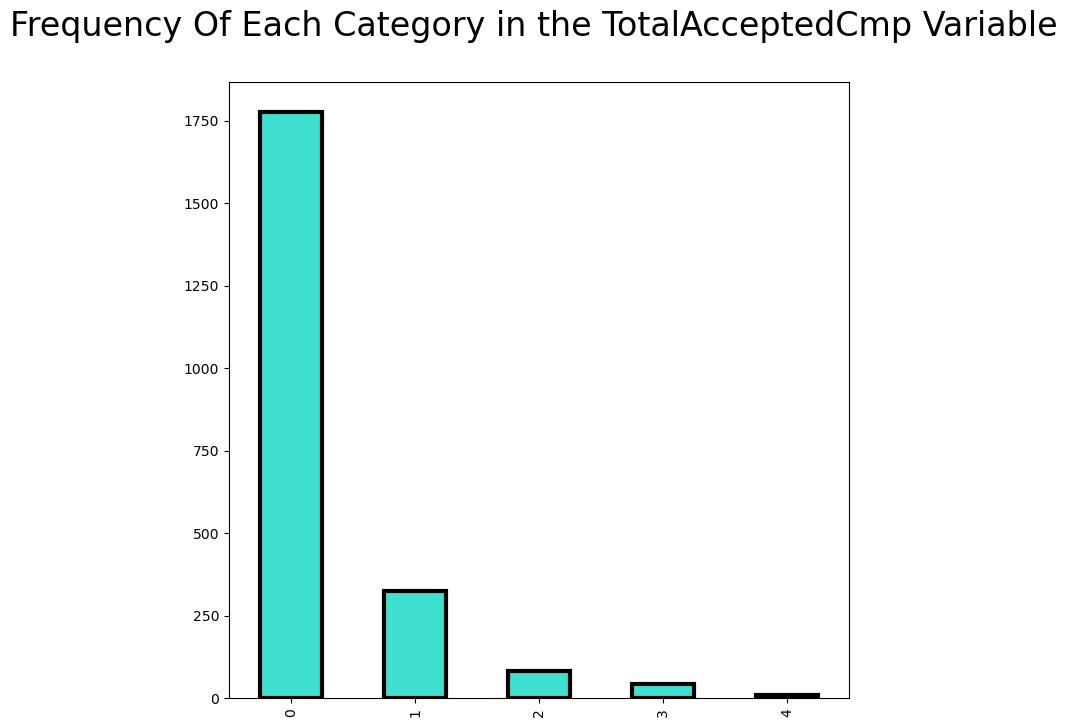

In [31]:
#CHECKING NUMBER OF UNIQUE CATEGORIES PRESENT IN THE "TotalAcceptedCmp"
print("Unique categories present in the TotalAcceptedCmp:",data['TotalAcceptedCmp'].value_counts())
print("\n")

#VISUALIZING THE "TotalAcceptedCmp"


plt.figure(figsize=(8,8))
data['TotalAcceptedCmp'].value_counts().plot(kind='bar',color = 'turquoise',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the TotalAcceptedCmp Variable \n",fontsize=24)
plt.show()

### 8.Analysis on "NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases" Variable.

In [32]:
data['NumWebPurchases'].unique()

array([ 8,  1,  2,  5,  6,  7,  4,  3, 11,  0, 27, 10,  9, 23, 25],
      dtype=int64)

In [33]:
data['NumCatalogPurchases'].unique()

array([10,  1,  2,  0,  3,  4,  6, 28,  9,  5,  8,  7, 11, 22],
      dtype=int64)

In [34]:
data['NumStorePurchases'].unique()

array([ 4,  2, 10,  6,  7,  0,  3,  8,  5, 12,  9, 13, 11,  1],
      dtype=int64)

In [35]:
data['NumTotalPurchases'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases'] + data['NumDealsPurchases']
data['NumTotalPurchases'].unique()

array([25,  6, 21,  8, 19, 22, 10,  2,  4, 16, 15,  5, 26,  9, 13, 12, 43,
       17, 20, 14, 27, 11, 18, 28,  7, 24, 29, 23, 32, 30, 37, 31, 33, 35,
       39,  1, 34,  0, 44], dtype=int64)

In [36]:
data[['NumTotalPurchases']]

,NumTotalPurchases
0,25
1,6
2,21
3,8
4,19
...,...
2235,18
2236,22
2237,19
2238,23


In [37]:
data['NumTotalPurchases'].describe()

count    2240.000000
mean       14.862054
std         7.677173
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        44.000000
Name: NumTotalPurchases, dtype: float64

In [38]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/12,58,635,...,0,0,0,0,0,0,1,1617,0,25
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/14,38,11,...,0,0,0,0,0,0,0,27,0,6
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/13,26,426,...,0,0,0,0,0,0,0,776,0,21
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/14,26,11,...,0,0,0,0,0,0,0,53,0,8
4,5324,1981,PhD,Married,58293.0,1,0,19/01/14,94,173,...,0,0,0,0,0,0,0,422,0,19


### 9.Converting the Year_Birth to customer_Age

In [39]:
#ADDING A COLUMN "customer_Age" IN THE DATAFRAME....
data['Customer_Age'] = (pd.Timestamp('now').year) - data['Year_Birth']
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/12,58,635,...,0,0,0,0,0,1,1617,0,25,66
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/14,38,11,...,0,0,0,0,0,0,27,0,6,69
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/13,26,426,...,0,0,0,0,0,0,776,0,21,58
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/14,26,11,...,0,0,0,0,0,0,53,0,8,39
4,5324,1981,PhD,Married,58293.0,1,0,19/01/14,94,173,...,0,0,0,0,0,0,422,0,19,42


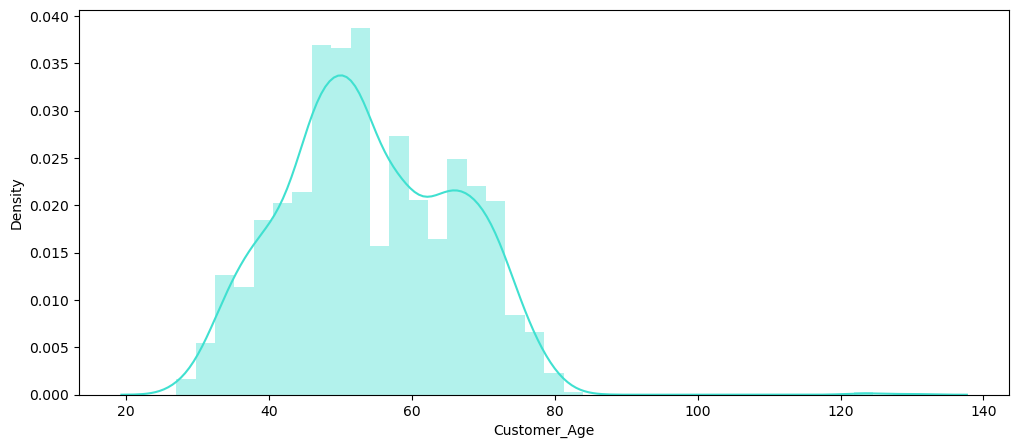

In [40]:
plt.figure(figsize=(12,5))
sns.distplot(data["Customer_Age"],color = 'turquoise')
plt.show()

In [41]:
# Deleting some column to reduce dimension and complexity of model

col_del = ["Year_Birth","ID","AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
data=data.drop(columns=col_del,axis=1)

In [42]:
data.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Response,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age
0,Graduation,Single,58138.0,04/09/12,58,0,1,1617,0,25,66
1,Graduation,Single,46344.0,08/03/14,38,0,0,27,0,6,69
2,Graduation,Together,71613.0,21/08/13,26,0,0,776,0,21,58
3,Graduation,Together,26646.0,10/02/14,26,0,0,53,0,8,39
4,PhD,Married,58293.0,19/01/14,94,0,0,422,0,19,42


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2240 non-null   object 
 1   Marital_Status     2240 non-null   object 
 2   Income             2240 non-null   float64
 3   Dt_Customer        2240 non-null   object 
 4   Recency            2240 non-null   int64  
 5   Complain           2240 non-null   int64  
 6   Response           2240 non-null   int64  
 7   Expenses           2240 non-null   int64  
 8   TotalAcceptedCmp   2240 non-null   int64  
 9   NumTotalPurchases  2240 non-null   int64  
 10  Customer_Age       2240 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 192.6+ KB


### I must check the newest and oldest recorded dates.

In [44]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


### The number of days the customers started to shop in the store relative to the last recorded date

In [45]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data['Customer_For'] = data['Customer_For'].apply(lambda x:x.days)

In [46]:
data.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Response,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age,Customer_For
0,Graduation,Single,58138.0,2012-04-09,58,0,1,1617,0,25,66,971
1,Graduation,Single,46344.0,2014-08-03,38,0,0,27,0,6,69,125
2,Graduation,Together,71613.0,2013-08-21,26,0,0,776,0,21,58,472
3,Graduation,Together,26646.0,2014-10-02,26,0,0,53,0,8,39,65
4,PhD,Married,58293.0,2014-01-19,94,0,0,422,0,19,42,321


In [47]:
data['Customer_For'].describe()

count    2240.000000
mean      512.043304
std       232.229893
min         0.000000
25%       340.750000
50%       513.000000
75%       685.250000
max      1063.000000
Name: Customer_For, dtype: float64

In [48]:
data.drop(['Dt_Customer','Recency','Complain','Response'],axis=1,inplace=True)

In [49]:
data.head()

,Education,Marital_Status,Income,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age,Customer_For
0,Graduation,Single,58138.0,1617,0,25,66,971
1,Graduation,Single,46344.0,27,0,6,69,125
2,Graduation,Together,71613.0,776,0,21,58,472
3,Graduation,Together,26646.0,53,0,8,39,65
4,PhD,Married,58293.0,422,0,19,42,321


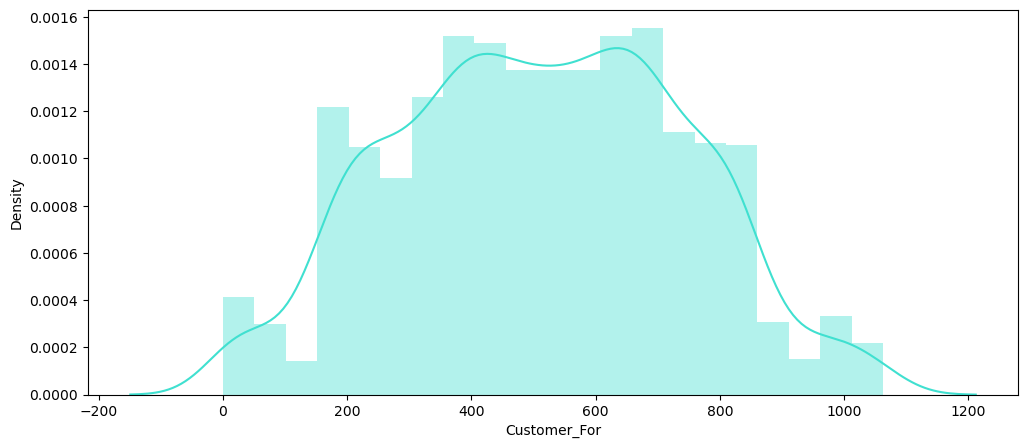

In [50]:
plt.figure(figsize=(12,5))

sns.distplot(data["Customer_For"],color = 'turquoise')
plt.show()

In [51]:
data.head()

,Education,Marital_Status,Income,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age,Customer_For
0,Graduation,Single,58138.0,1617,0,25,66,971
1,Graduation,Single,46344.0,27,0,6,69,125
2,Graduation,Together,71613.0,776,0,21,58,472
3,Graduation,Together,26646.0,53,0,8,39,65
4,PhD,Married,58293.0,422,0,19,42,321


In [52]:
data.shape

(2240, 8)

### Bivariate Analysis :-

#### 1.Education vs Expenses

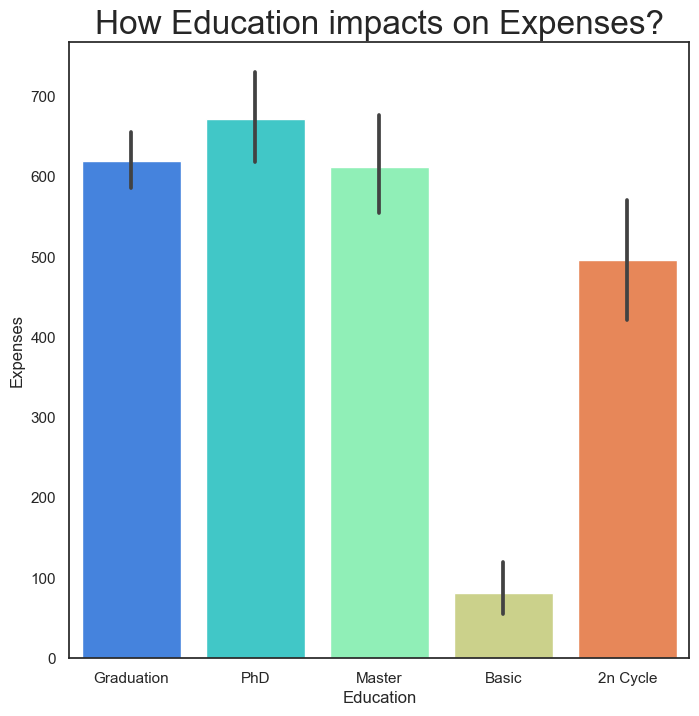

In [53]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Education impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="Education", y="Expenses", data=data,palette="rainbow")

#### 2.Marital status vs Expenses

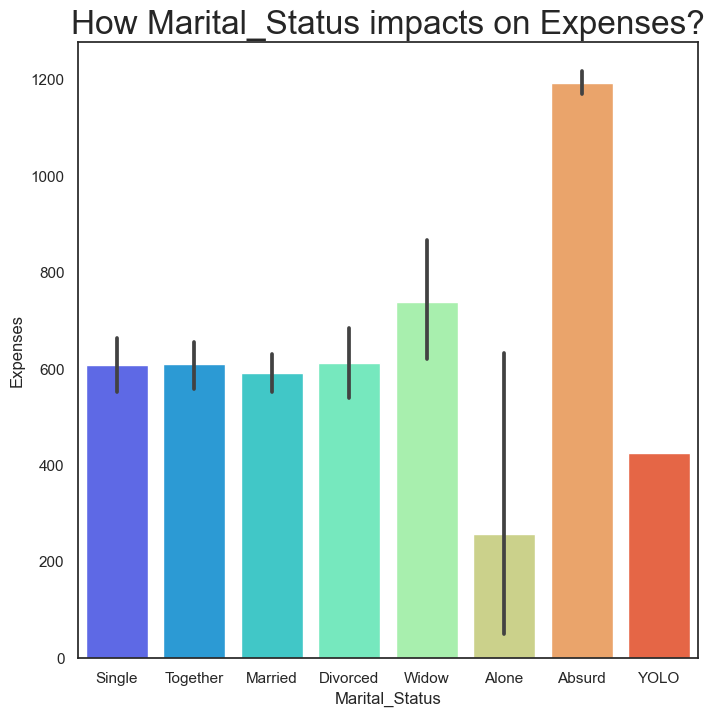

In [54]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Marital_Status impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="Marital_Status", y="Expenses", data=data,palette="rainbow")

#### 3.TotalAcceptedCmp vs Expenses

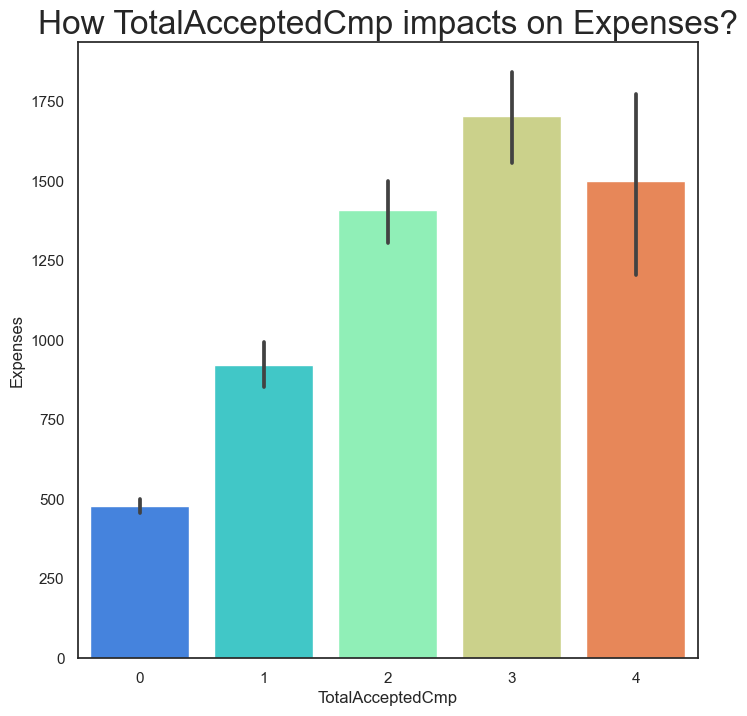

In [56]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How TotalAcceptedCmp impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="TotalAcceptedCmp", y="Expenses", data=data,palette="rainbow")

#### 4.NumTotalPurchases vs Expenses

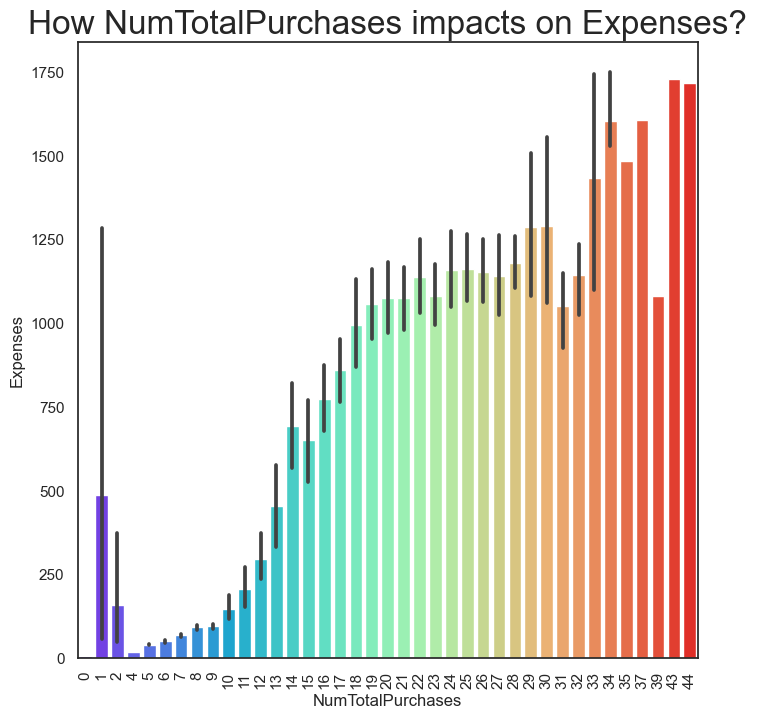

In [57]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How NumTotalPurchases impacts on Expenses?",fontsize=24)
plt.xticks(rotation=90)
ax = sns.barplot(x="NumTotalPurchases", y="Expenses", data=data,palette="rainbow")

#### 6.Day engaged vs Expenses

In [58]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Expenses', 'TotalAcceptedCmp',
       'NumTotalPurchases', 'Customer_Age', 'Customer_For'],
      dtype='object')

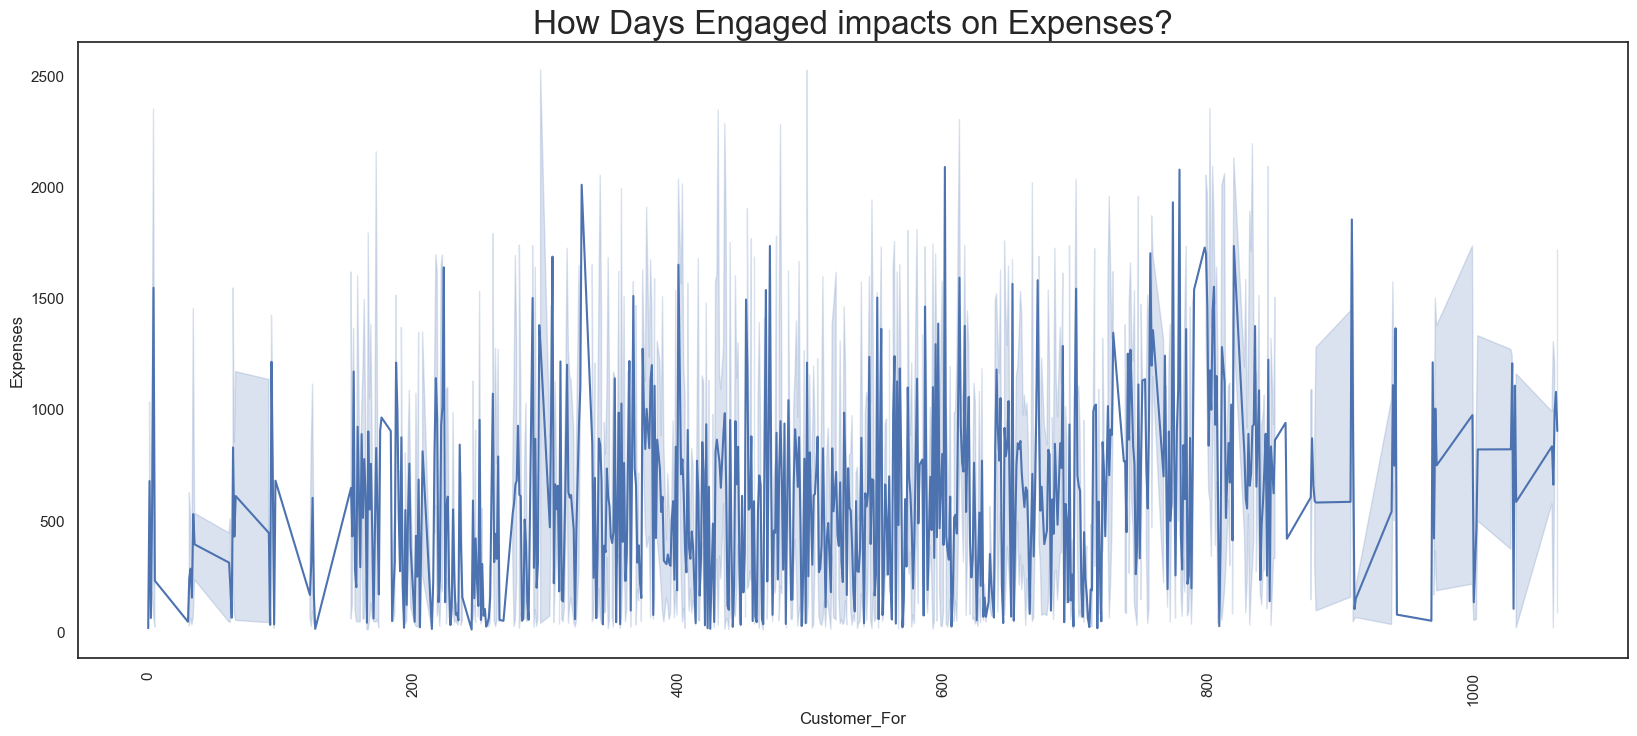

In [59]:
sns.set_theme(style="white")
plt.figure(figsize=(20,8))
plt.title("How Days Engaged impacts on Expenses?",fontsize=24)
plt.xticks(rotation=90)
ax = sns.lineplot(x="Customer_For", y="Expenses", data=data,palette="rainbow")

#### 7.Customer Age vs Expenses

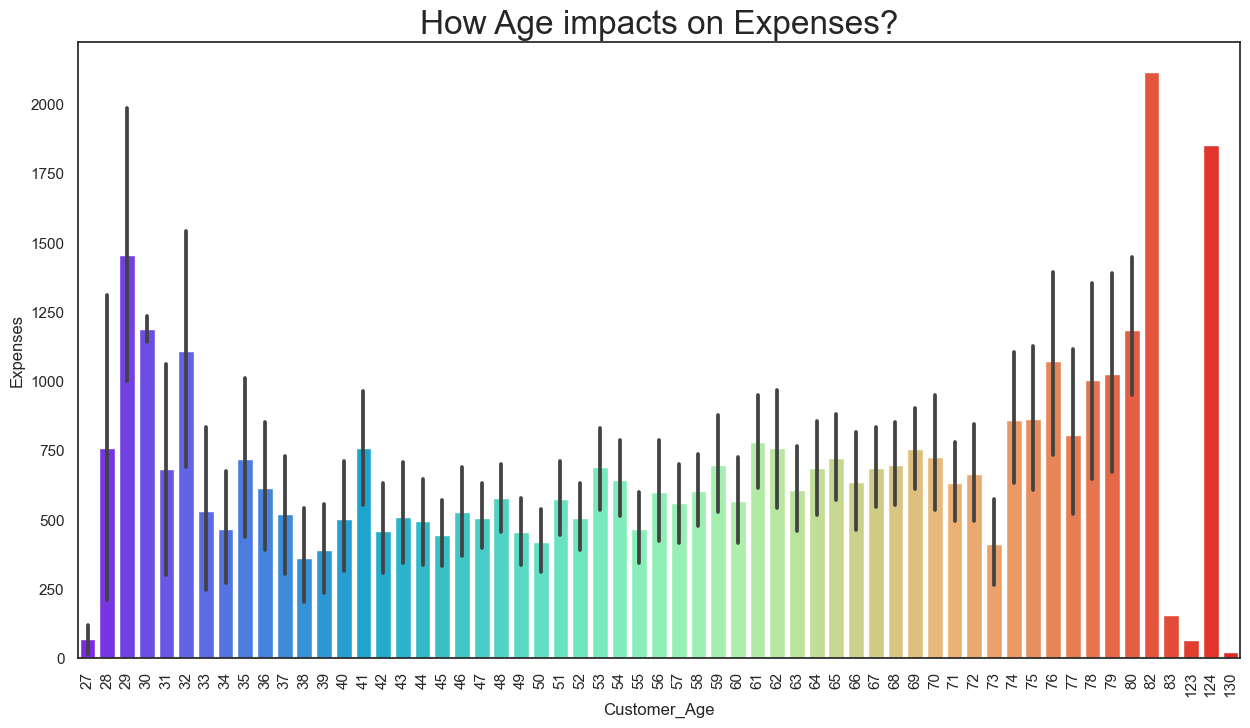

In [60]:
sns.set_theme(style="white")
plt.figure(figsize=(15,8))
plt.title("How Age impacts on Expenses?",fontsize=24)
plt.xticks(rotation=90)
ax = sns.barplot(x="Customer_Age", y="Expenses", data=data,palette="rainbow")

plt.show()

## Remove some outliers present in age and income

In [61]:
data['Income'].describe()

count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

In [62]:
data['Customer_For'].describe()

count    2240.000000
mean      512.043304
std       232.229893
min         0.000000
25%       340.750000
50%       513.000000
75%       685.250000
max      1063.000000
Name: Customer_For, dtype: float64

In [63]:
data.shape

(2240, 8)

In [64]:
data = data[data['Customer_Age'] < 90]
data = data[data['Income'] < 300000]

In [65]:
data.shape

(2236, 8)

In [66]:
data.head()

,Education,Marital_Status,Income,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age,Customer_For
0,Graduation,Single,58138.0,1617,0,25,66,971
1,Graduation,Single,46344.0,27,0,6,69,125
2,Graduation,Together,71613.0,776,0,21,58,472
3,Graduation,Together,26646.0,53,0,8,39,65
4,PhD,Married,58293.0,422,0,19,42,321


## correlation

<Axes: >

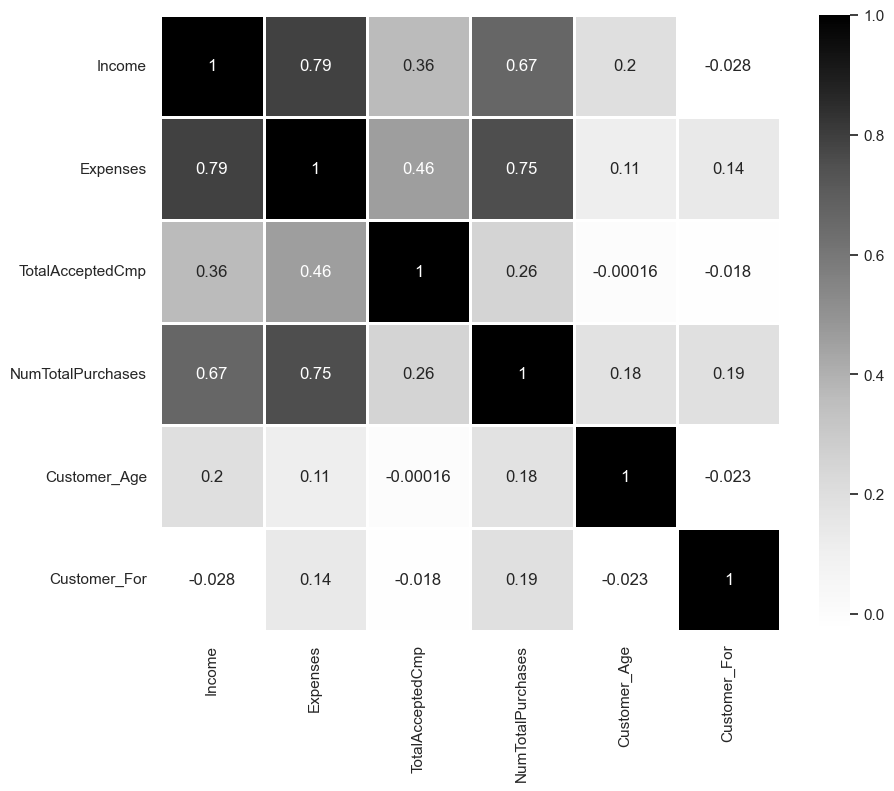

In [67]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True,cmap = 'Greys',linewidths=1)

## Income is more positively correlated to Expenses and Number of purchases

In [68]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  

data['Education'] = label_encoder.fit_transform(data['Education'])
data['Marital_Status'] = label_encoder.fit_transform(data['Marital_Status'])

In [69]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Expenses', 'TotalAcceptedCmp',
       'NumTotalPurchases', 'Customer_Age', 'Customer_For'],
      dtype='object')

In [70]:
data.head()

,Education,Marital_Status,Income,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age,Customer_For
0,2,4,58138.0,1617,0,25,66,971
1,2,4,46344.0,27,0,6,69,125
2,2,5,71613.0,776,0,21,58,472
3,2,5,26646.0,53,0,8,39,65
4,4,3,58293.0,422,0,19,42,321


# K-means

In [71]:
X_0 = data.copy()

In [72]:
from sklearn.cluster import KMeans

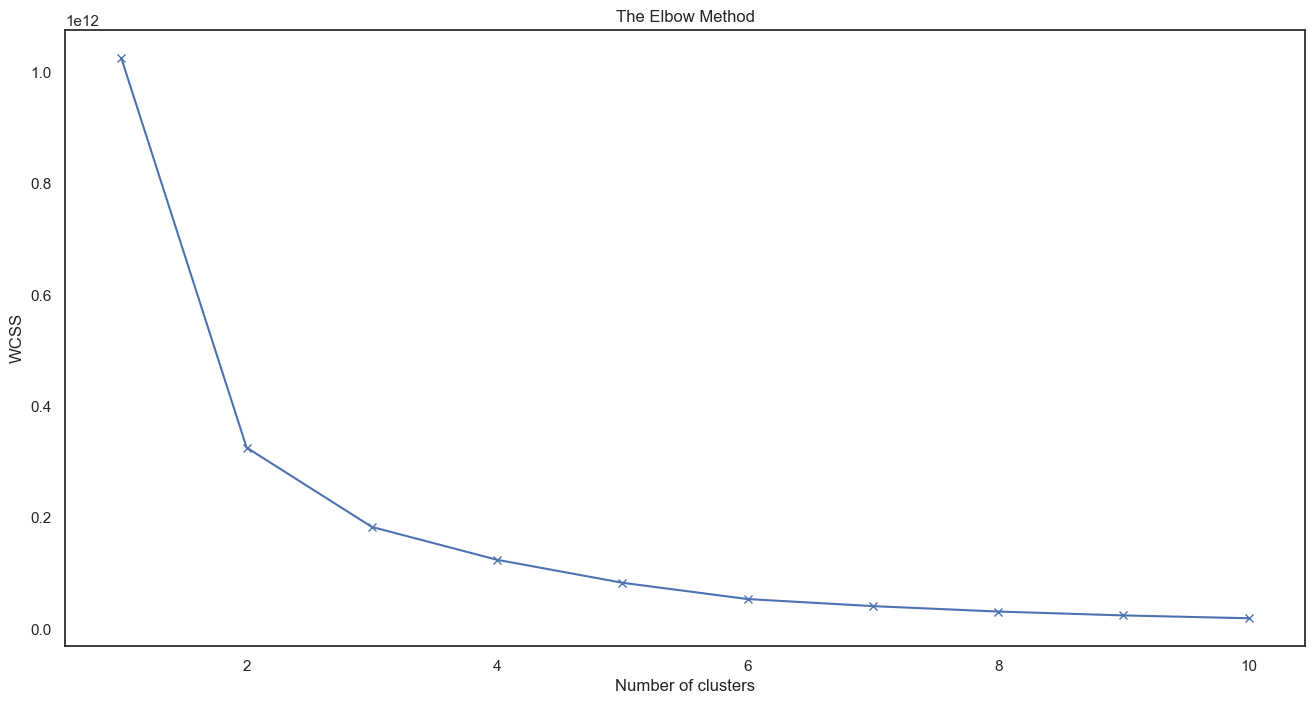

In [73]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X_0)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [74]:
# Training a predicting using K-Means Algorithm.

kmeans=KMeans(n_clusters=2, random_state=42).fit(X_0)
pred=kmeans.predict(X_0)


# Appending those cluster value into main dataframe (without standard-scalar)

X_0['cluster_Kmeans'] = pred + 1

In [75]:
X_0.head()

,Education,Marital_Status,Income,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age,Customer_For,cluster_Kmeans
0,2,4,58138.0,1617,0,25,66,971,2
1,2,4,46344.0,27,0,6,69,125,1
2,2,5,71613.0,776,0,21,58,472,2
3,2,5,26646.0,53,0,8,39,65,1
4,4,3,58293.0,422,0,19,42,321,2


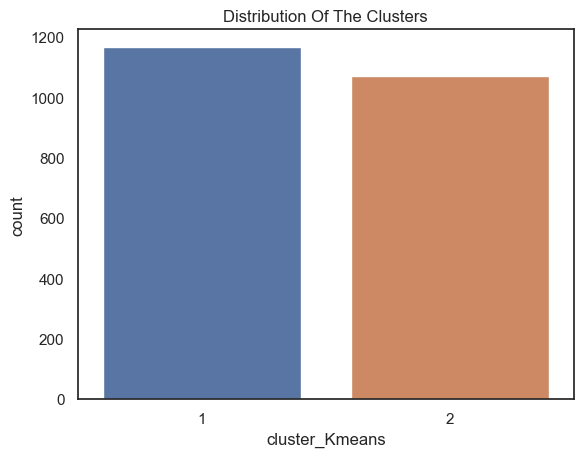

In [76]:
sns.countplot(x=X_0["cluster_Kmeans"])
plt.title("Distribution Of The Clusters")
plt.show()

# PCA with Agglomerative clustering

In [77]:
data.head()

,Education,Marital_Status,Income,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age,Customer_For
0,2,4,58138.0,1617,0,25,66,971
1,2,4,46344.0,27,0,6,69,125
2,2,5,71613.0,776,0,21,58,472
3,2,5,26646.0,53,0,8,39,65
4,4,3,58293.0,422,0,19,42,321


In [78]:
X_1 = data.copy()

In [79]:
X_1.head()

,Education,Marital_Status,Income,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age,Customer_For
0,2,4,58138.0,1617,0,25,66,971
1,2,4,46344.0,27,0,6,69,125
2,2,5,71613.0,776,0,21,58,472
3,2,5,26646.0,53,0,8,39,65
4,4,3,58293.0,422,0,19,42,321


In [80]:
from sklearn.decomposition import PCA
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(X_1)
PCA_ds = pd.DataFrame(pca.transform(X_1), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2236.0,-2.212724e-12,21416.740422,-50223.420193,-16458.236030,-580.071814,16319.915764,110406.067534
col2,2236.0,-4.474258e-14,377.054208,-2160.395711,-211.149464,34.121082,229.647506,2854.476638
col3,2236.0,3.254006e-15,219.599515,-680.971904,-158.758886,2.892461,155.691342,882.772300


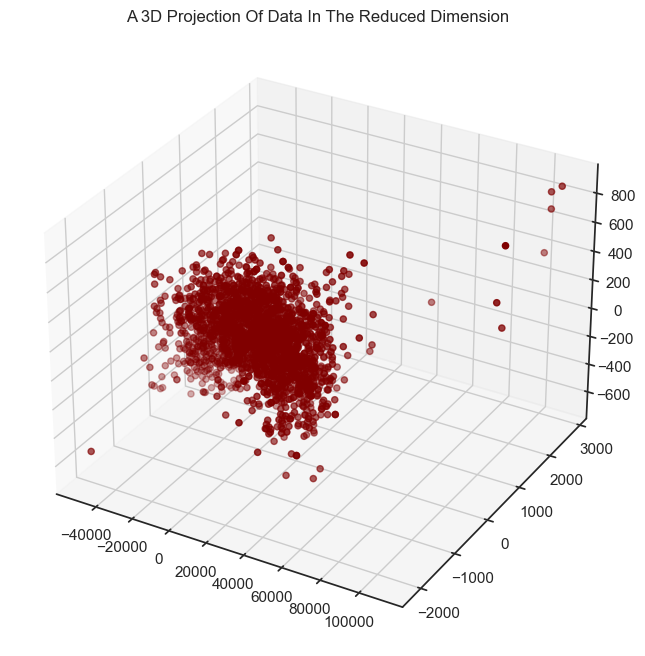

In [81]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")

plt.show()

In [82]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

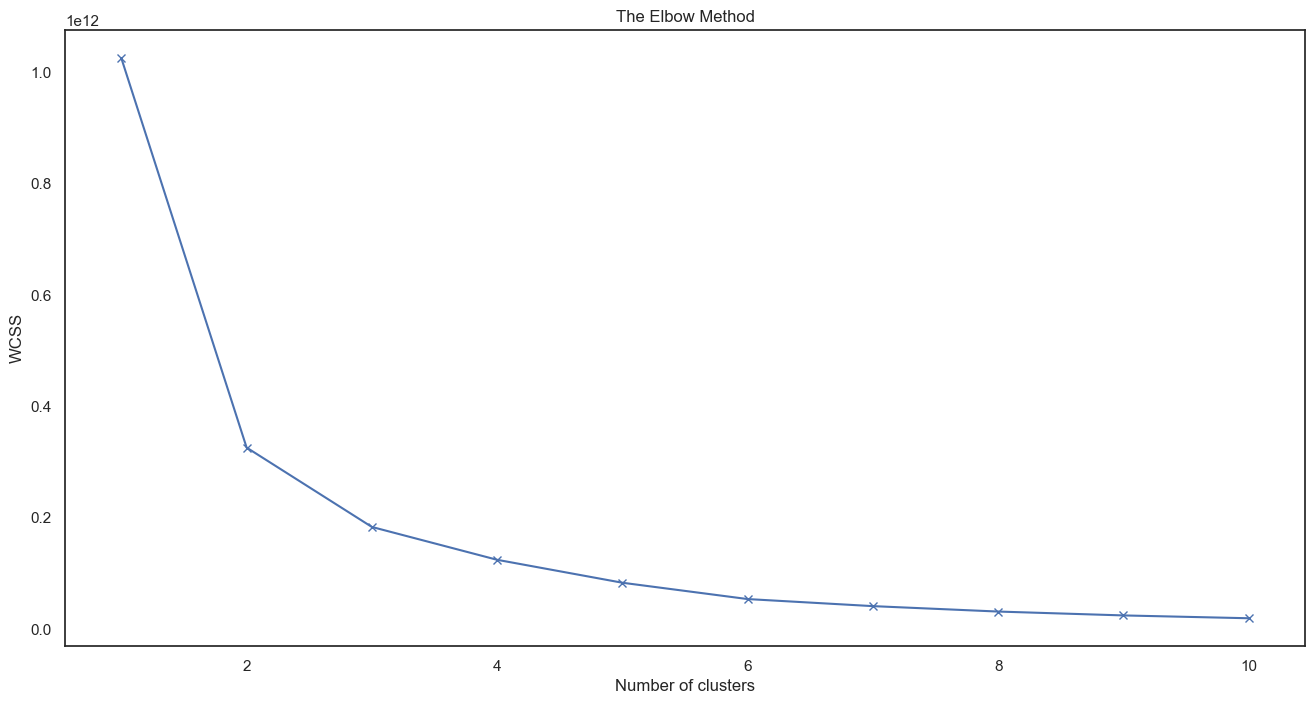

In [83]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(PCA_ds)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [84]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=2)

# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC

#Adding the Clusters feature to the orignal dataframe.
X_1["Cluster_Agglo"]= yhat_AC + 1

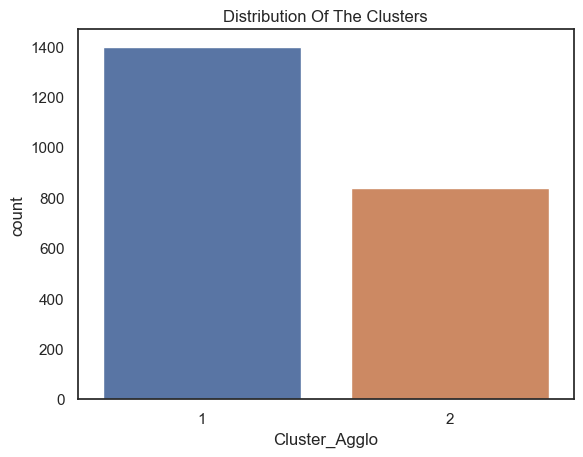

In [85]:
sns.countplot(x=X_1["Cluster_Agglo"])
plt.title("Distribution Of The Clusters")
plt.show()

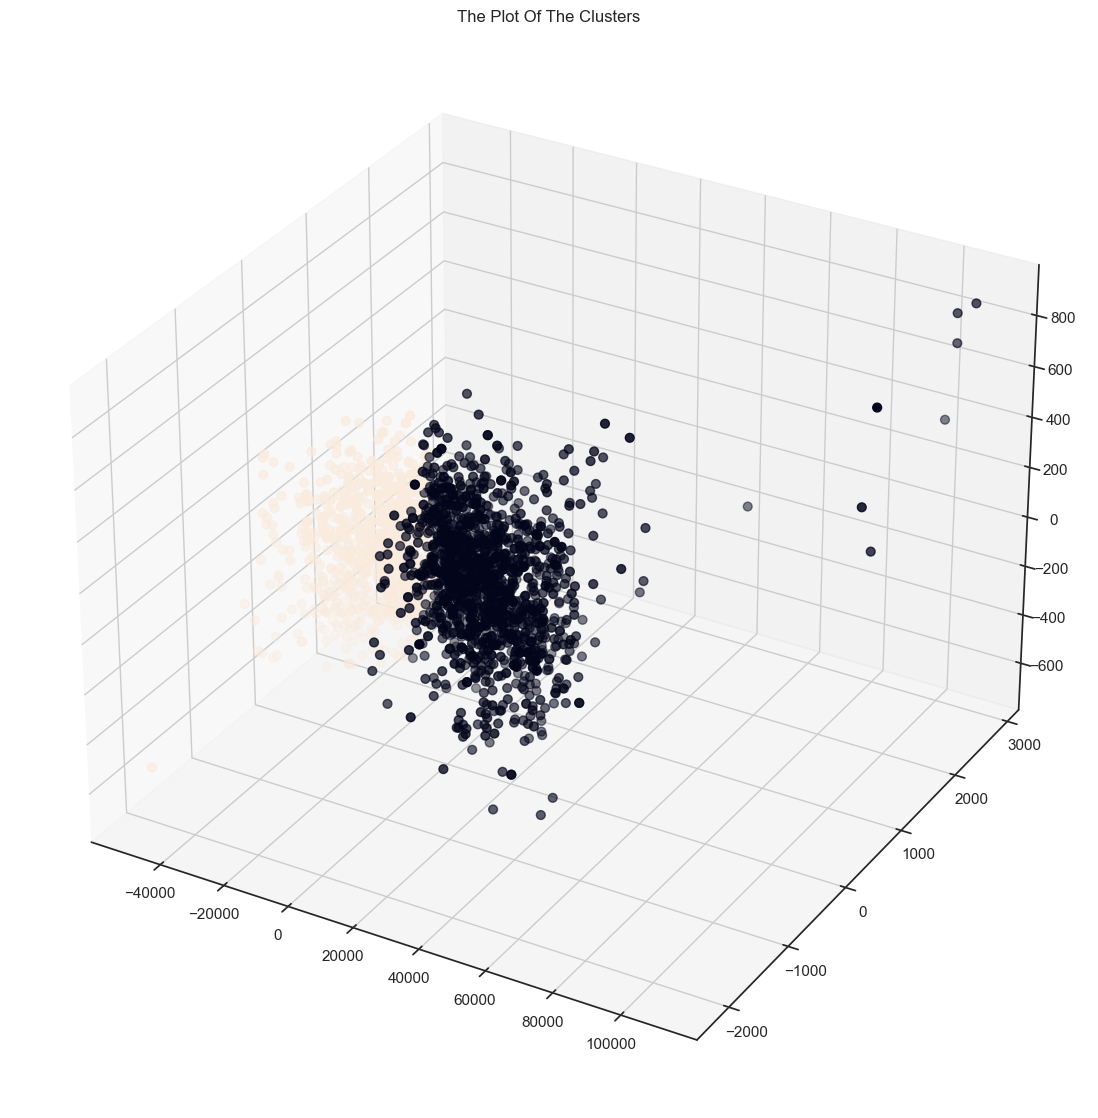

In [86]:
#Plotting the clusters
fig = plt.figure(figsize=(16,14))
ax = plt.subplot(111, projection='3d', label="bla")

ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o')
ax.set_title("The Plot Of The Clusters")

plt.show()

### Cluster 1:
People with less expenses,
people who are married and parents of more than Three kids,
people with low income.

### Cluster 2:
people with more expenses,
people who are single or parents who have less than Three kids,
people with high income,
Age is not the criteria but it is observed to some extent that people who are older fall in this group.